# Speech Emotion Recognition using the RAVDESS AND TESS dataset

For this task, I have used 5252 samples from

the Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS) dataset
the Toronto emotional speech set (TESS) dataset
The samples include:

**1440 **speech files and **1012** Song files from **RAVDESS**. This dataset includes recordings of 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech includes calm, happy, sad, angry, fearful, surprise, and disgust expressions, and song contains calm, happy, sad, angry, and fearful emotions. Each file was rated 10 times on emotional validity, intensity, and genuineness. Ratings were provided by 247 individuals who were characteristic of untrained adult research participants from North America. A further set of 72 participants provided test-retest data. High levels of emotional validity, interrater reliability, and test-retest intrarater reliability were reported. Validation data is open-access, and can be downloaded along with our paper from PLoS ONE.

**2800** files from **TESS**. A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 stimuli in total. Two actresses were recruited from the Toronto area. Both actresses speak English as their first language, are university educated, and have musical training. Audiometric testing indicated that both actresses have thresholds within the normal range.

In [1]:
# Loading saved models
import joblib
X = joblib.load('Ravtess/X.joblib')
y = joblib.load('Ravtess/y.joblib')

# Decision Tree Classifier

To make a first attempt in accomplishing this classification task I chose a decision tree:

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
dtree = DecisionTreeClassifier()

In [5]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
predictions = dtree.predict(X_test)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       195
           1       0.59      0.61      0.60       127
           2       0.62      0.61      0.62       266
           3       0.71      0.65      0.68       257
           4       0.73      0.71      0.72       258
           5       0.64      0.71      0.67       238
           6       0.66      0.67      0.67       207
           7       0.60      0.61      0.61       185

    accuracy                           0.68      1733
   macro avg       0.67      0.67      0.67      1733
weighted avg       0.68      0.68      0.68      1733



# Neural network

In [8]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [9]:
x_traincnn.shape, x_testcnn.shape

((3518, 40, 1), (1733, 40, 1))

In [10]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=1e-07)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [13]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=200, validation_data=(x_testcnn, y_test))

Epoch 1/200
220/220 [==============================] - 2s 6ms/step - loss: 3.7943 - accuracy: 0.1876 - val_loss: 1.6139 - val_accuracy: 0.4022
Epoch 2/200
220/220 [==============================] - 1s 5ms/step - loss: 2.4406 - accuracy: 0.3061 - val_loss: 1.5142 - val_accuracy: 0.4559
Epoch 3/200
220/220 [==============================] - 1s 5ms/step - loss: 1.8549 - accuracy: 0.3968 - val_loss: 1.3496 - val_accuracy: 0.5130
Epoch 4/200
220/220 [==============================] - 1s 5ms/step - loss: 1.5613 - accuracy: 0.4858 - val_loss: 1.2938 - val_accuracy: 0.5193
Epoch 5/200
220/220 [==============================] - 1s 5ms/step - loss: 1.4192 - accuracy: 0.5262 - val_loss: 1.1898 - val_accuracy: 0.5834
Epoch 6/200
220/220 [==============================] - 1s 5ms/step - loss: 1.3186 - accuracy: 0.5512 - val_loss: 1.0986 - val_accuracy: 0.6157
Epoch 7/200
220/220 [==============================] - 1s 5ms/step - loss: 1.2362 - accuracy: 0.5725 - val_loss: 1.0656 - val_accuracy: 0.6261

Epoch 58/200
220/220 [==============================] - 1s 5ms/step - loss: 0.5810 - accuracy: 0.7834 - val_loss: 0.5847 - val_accuracy: 0.7882
Epoch 59/200
220/220 [==============================] - 1s 5ms/step - loss: 0.5689 - accuracy: 0.7865 - val_loss: 0.5790 - val_accuracy: 0.7882
Epoch 60/200
220/220 [==============================] - 1s 6ms/step - loss: 0.5659 - accuracy: 0.7948 - val_loss: 0.5693 - val_accuracy: 0.7952
Epoch 61/200
220/220 [==============================] - 1s 6ms/step - loss: 0.5726 - accuracy: 0.7933 - val_loss: 0.5786 - val_accuracy: 0.7957
Epoch 62/200
220/220 [==============================] - 1s 5ms/step - loss: 0.5623 - accuracy: 0.7854 - val_loss: 0.5637 - val_accuracy: 0.7940
Epoch 63/200
220/220 [==============================] - 1s 6ms/step - loss: 0.5557 - accuracy: 0.7919 - val_loss: 0.5607 - val_accuracy: 0.7975
Epoch 64/200
220/220 [==============================] - 1s 6ms/step - loss: 0.5543 - accuracy: 0.7899 - val_loss: 0.5656 - val_accuracy:

Epoch 115/200
220/220 [==============================] - 1s 6ms/step - loss: 0.4089 - accuracy: 0.8508 - val_loss: 0.4852 - val_accuracy: 0.8159
Epoch 116/200
220/220 [==============================] - 1s 6ms/step - loss: 0.4035 - accuracy: 0.8599 - val_loss: 0.4777 - val_accuracy: 0.8240
Epoch 117/200
220/220 [==============================] - 1s 6ms/step - loss: 0.4070 - accuracy: 0.8508 - val_loss: 0.4877 - val_accuracy: 0.8223
Epoch 118/200
220/220 [==============================] - 1s 6ms/step - loss: 0.4079 - accuracy: 0.8562 - val_loss: 0.4848 - val_accuracy: 0.8252
Epoch 119/200
220/220 [==============================] - 1s 6ms/step - loss: 0.4096 - accuracy: 0.8525 - val_loss: 0.4705 - val_accuracy: 0.8263
Epoch 120/200
220/220 [==============================] - 1s 6ms/step - loss: 0.3963 - accuracy: 0.8530 - val_loss: 0.5057 - val_accuracy: 0.8200
Epoch 121/200
220/220 [==============================] - 1s 6ms/step - loss: 0.4015 - accuracy: 0.8559 - val_loss: 0.4814 - val_ac

220/220 [==============================] - 2s 7ms/step - loss: 0.3036 - accuracy: 0.8943 - val_loss: 0.4534 - val_accuracy: 0.8350
Epoch 172/200
220/220 [==============================] - 1s 7ms/step - loss: 0.3138 - accuracy: 0.8900 - val_loss: 0.4449 - val_accuracy: 0.8459
Epoch 173/200
220/220 [==============================] - 2s 10ms/step - loss: 0.2954 - accuracy: 0.8954 - val_loss: 0.4555 - val_accuracy: 0.8396
Epoch 174/200
220/220 [==============================] - 2s 8ms/step - loss: 0.2927 - accuracy: 0.8937 - val_loss: 0.4429 - val_accuracy: 0.8355
Epoch 175/200
220/220 [==============================] - 2s 8ms/step - loss: 0.2876 - accuracy: 0.8971 - val_loss: 0.4411 - val_accuracy: 0.8390
Epoch 176/200
220/220 [==============================] - 2s 7ms/step - loss: 0.2935 - accuracy: 0.8940 - val_loss: 0.4402 - val_accuracy: 0.8396
Epoch 177/200
220/220 [==============================] - 2s 7ms/step - loss: 0.2995 - accuracy: 0.8940 - val_loss: 0.4443 - val_accuracy: 0.838

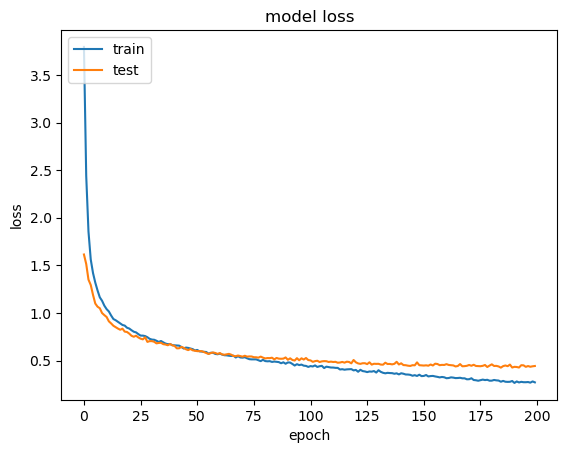

In [14]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

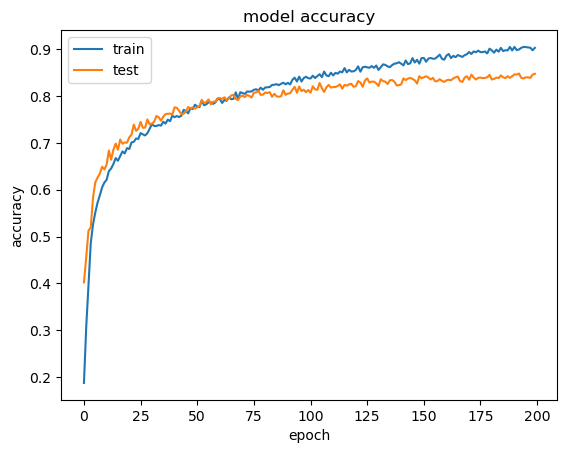

In [15]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
predictions = np.argmax(model.predict(x_testcnn), axis=1)

55/55 [==============================] - 0s 2ms/step


In [17]:
predictions

array([3, 7, 2, ..., 1, 2, 4], dtype=int64)

In [18]:
y_test

array([3, 7, 2, ..., 1, 2, 4], dtype=int64)

In [19]:
new_Ytest = y_test.astype(int)

In [20]:
new_Ytest

array([3, 7, 2, ..., 1, 2, 4])

In [21]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       195
           1       0.64      0.93      0.76       127
           2       0.90      0.76      0.82       266
           3       0.91      0.77      0.84       257
           4       0.92      0.89      0.91       258
           5       0.75      0.90      0.82       238
           6       0.87      0.85      0.86       207
           7       0.84      0.85      0.84       185

    accuracy                           0.85      1733
   macro avg       0.85      0.86      0.85      1733
weighted avg       0.86      0.85      0.85      1733



In [22]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[173  15   0   5   0   1   0   1]
 [  3 118   1   1   0   3   1   0]
 [  1  27 202   0  11  14   5   6]
 [  4  11   3 199   0  30   3   7]
 [  0   2   5   0 230   9   7   5]
 [  0   1   6  11   2 214   1   3]
 [  0   7   3   1   5   7 175   9]
 [  1   3   5   1   2   6   9 158]]


In [23]:
model.save('testing10_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [24]:
new_model=keras.models.load_model('testing10_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 64)            384       
                                                                 
 activation (Activation)     (None, 40, 64)            0         
                                                                 
 dropout (Dropout)           (None, 40, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 128)           41088     
                                                                 
 activation_1 (Activation)   (None, 10, 128)           0         
                                                        

In [25]:
loss, acc = new_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

55/55 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8477
Restored model, accuracy: 84.77%


Original X_test shape: (1733, 40)
55/55 [==============================] - 0s 2ms/step

Accuracy: 84.77%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       195
           1       0.64      0.93      0.76       127
           2       0.90      0.76      0.82       266
           3       0.91      0.77      0.84       257
           4       0.92      0.89      0.91       258
           5       0.75      0.90      0.82       238
           6       0.87      0.85      0.86       207
           7       0.84      0.85      0.84       185

    accuracy                           0.85      1733
   macro avg       0.85      0.86      0.85      1733
weighted avg       0.86      0.85      0.85      1733



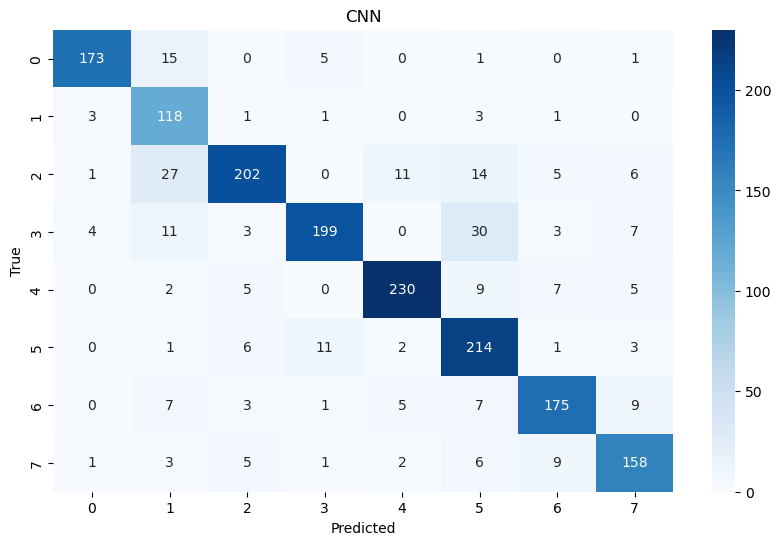

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_test is an array
X_test = np.array(X_test)

print("Original X_test shape:", X_test.shape)

# Reshape for Conv1D: (samples, timesteps, channels)
if len(X_test.shape) == 2:
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
else:
    X_test_reshaped = X_test  # already in the right shape

# Predict
y_prob = model.predict(X_test_reshaped)
y_pred = np.argmax(y_prob, axis=1)

# Convert y_test to labels if one-hot encoded
y_test = np.array(y_test)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Accuracy
accuracy = accuracy_score(y_true, y_pred) * 100
print(f"\nAccuracy: {accuracy:.2f}%")

# Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_true),
            yticklabels=np.unique(y_true))
plt.title("CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
